# Midterm Project: Heart Failure Prediction

Data Source: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

Attribute Information:
* Age: age of the patient (years)
* Sex: sex of the patient (M: Male, F: Female)
* ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
* RestingBP: resting blood pressure (mm Hg)
* Cholesterol: serum cholesterol (mm/dl)
* FastingBS: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
* RestingECG: resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
* MaxHR: maximum heart rate achieved (Numeric value between 60 and 202)
* ExerciseAngina: exercise-induced angina (Y: Yes, N: No)
* Oldpeak: oldpeak = ST (Numeric value measured in depression)
* ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
* HeartDisease: output class (1: heart disease, 0: Normal)


## Data Preparation

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
df.columns = df.columns.str.lower()
df.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Validation Framework

In [4]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

(550, 184, 184)

In [5]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [6]:

y_train = df_train.heartdisease.values
y_val = df_val.heartdisease.values
y_test = df_test.heartdisease.values

del df_train['heartdisease']
del df_val['heartdisease']
del df_test['heartdisease']

## EDA

In [7]:
df_full_train.describe()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.651226,133.064033,199.683924,0.227520,136.178474,0.905041,0.546322
std,9.364290,18.438941,108.216855,0.419517,25.329254,1.082952,0.498189
min,29.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,177.000000,0.000000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,269.000000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
for col in df_full_train.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age
[40 49 37 48 54]
50

sex
['M' 'F']
2

chestpaintype
['ATA' 'NAP' 'ASY' 'TA']
4

restingbp
[140 160 130 138 150]
67

cholesterol
[289 180 283 214 195]
222

fastingbs
[0 1]
2

restingecg
['Normal' 'ST' 'LVH']
3

maxhr
[172 156  98 108 122]
119

exerciseangina
['N' 'Y']
2

oldpeak
[0.  1.  1.5 2.  3. ]
53

st_slope
['Up' 'Flat' 'Down']
3

heartdisease
[0 1]
2



In [9]:
df_full_train.heartdisease.value_counts(normalize=True)

heartdisease
1    0.546322
0    0.453678
Name: proportion, dtype: float64

In [10]:
categorical = ['sex', 'chestpaintype', 'fastingbs', 'restingecg', 'exerciseangina', 'st_slope']
numerical = ['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']

In [11]:
df_full_train[categorical].nunique()

sex               2
chestpaintype     4
fastingbs         2
restingecg        3
exerciseangina    2
st_slope          3
dtype: int64

## Age

<Axes: xlabel='age', ylabel='Count'>

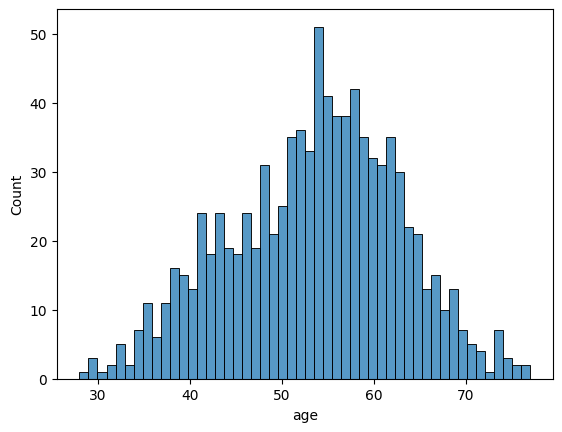

In [12]:
sns.histplot(df.age, bins=50)

## Resting BP (resting blood pressure (mm Hg))

<Axes: xlabel='restingbp', ylabel='Count'>

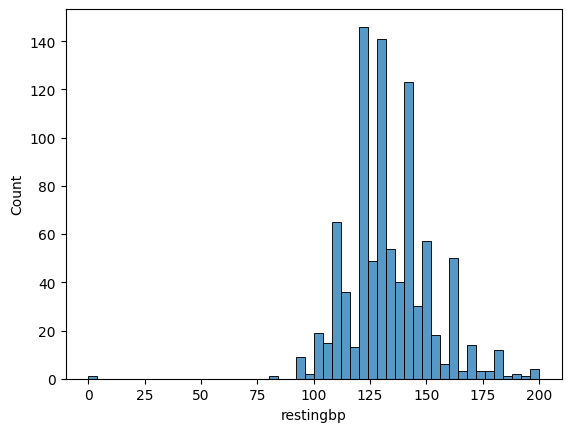

In [13]:
sns.histplot(df.restingbp, bins=50)

In [14]:
# Strange values
df[df.restingbp < 70].head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


## Cholesterol

<Axes: xlabel='cholesterol', ylabel='Count'>

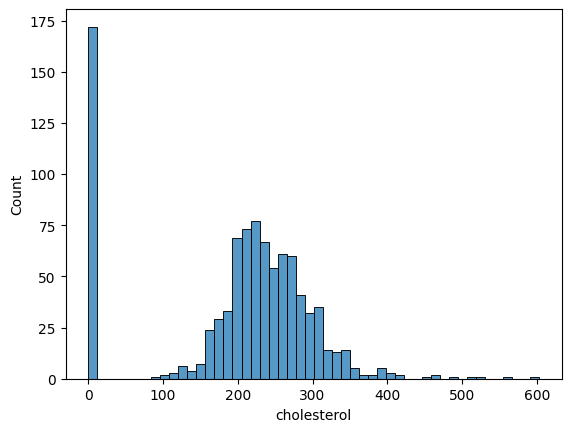

In [15]:
sns.histplot(df.cholesterol, bins=50)

In [16]:
# Strange values
cholesterol_df = df[df.cholesterol < 100]
cholesterol_df.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1


In [17]:
cholesterol_df.cholesterol.unique()

array([85,  0])

## Max HR

<Axes: xlabel='maxhr', ylabel='Count'>

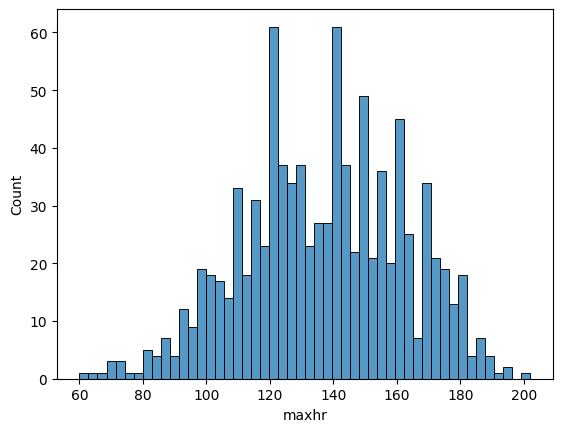

In [18]:
sns.histplot(df.maxhr, bins=50)

## Old Peak

<Axes: xlabel='oldpeak', ylabel='Count'>

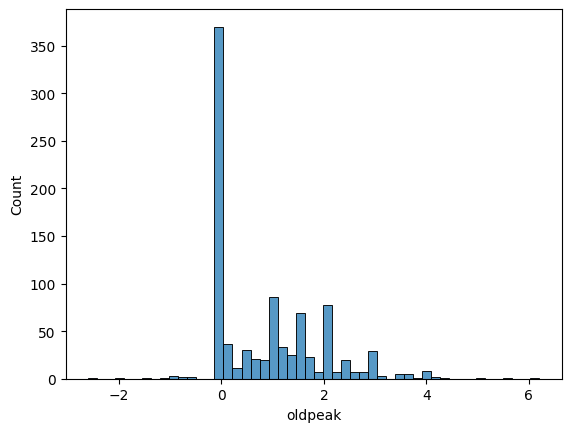

In [19]:
sns.histplot(df.oldpeak, bins=50)

## Risk Ratio

In [20]:
from IPython.display import display

global_heartdisease = df_full_train.heartdisease.mean()

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).heartdisease.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_heartdisease
    df_group['risk'] = df_group['mean'] / global_heartdisease
    display(df_group)
    print()
    print()

sex


,mean,count,diff,risk
sex,,,,
F,0.253012,166,-0.293309,0.463119
M,0.632042,568,0.085721,1.156905




chestpaintype


,mean,count,diff,risk
chestpaintype,,,,
ASY,0.770574,401,0.224252,1.410476
ATA,0.136691,139,-0.409631,0.250202
NAP,0.364198,162,-0.182124,0.666636
TA,0.437500,32,-0.108822,0.800810




fastingbs


,mean,count,diff,risk
fastingbs,,,,
0,0.476190,567,-0.070131,0.871630
1,0.784431,167,0.238110,1.435842




restingecg


,mean,count,diff,risk
restingecg,,,,
LVH,0.563758,149,0.017437,1.031917
Normal,0.509009,444,-0.037313,0.931702
ST,0.645390,141,0.099069,1.181337




exerciseangina


,mean,count,diff,risk
exerciseangina,,,,
N,0.327146,431,-0.219175,0.598816
Y,0.858086,303,0.311764,1.570661




st_slope


,mean,count,diff,risk
st_slope,,,,
Down,0.770833,48,0.224512,1.410952
Flat,0.817942,379,0.271620,1.497181
Up,0.175896,307,-0.370426,0.321964


## Mutial information

In [21]:
from sklearn.metrics import mutual_info_score

def mutual_info_heartdisease_score(series):
    return mutual_info_score(series, df_full_train.heartdisease)

mi = df_full_train[categorical].apply(mutual_info_heartdisease_score)
mi.sort_values(ascending=False)

st_slope          0.214106
exerciseangina    0.149062
chestpaintype     0.144451
sex               0.051851
fastingbs         0.035691
restingecg        0.005695
dtype: float64

## Correlation

In [22]:
df_full_train[numerical].corrwith(df_full_train.heartdisease).abs().sort_values(ascending=False)

oldpeak        0.422740
maxhr          0.414676
age            0.299410
cholesterol    0.251893
restingbp      0.138611
dtype: float64

## Version 0 - Simple Logistic Regression

In [23]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

from pprint import pp

In [24]:
def version0():

    columns = categorical + numerical

    dv = DictVectorizer(sparse=False)

    train_dict = df_train[columns].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[columns].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]

    print(f"Accuracy: {accuracy_score(y_val, y_pred >= 0.5):.4f}")
    print(f"ROC AUC Score {roc_auc_score(y_val, y_pred):.4f}")
    print()

    pp(dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3))))

version0()


Accuracy: 0.8859
ROC AUC Score 0.9432

{'age': 0.012,
 'chestpaintype=ASY': 0.999,
 'chestpaintype=ATA': -0.34,
 'chestpaintype=NAP': -0.516,
 'chestpaintype=TA': -0.168,
 'cholesterol': -0.006,
 'exerciseangina=N': -0.564,
 'exerciseangina=Y': 0.539,
 'fastingbs': 0.698,
 'maxhr': -0.003,
 'oldpeak': 0.473,
 'restingbp': -0.001,
 'restingecg=LVH': 0.216,
 'restingecg=Normal': 0.021,
 'restingecg=ST': -0.262,
 'sex=F': -0.651,
 'sex=M': 0.627,
 'st_slope=Down': -0.389,
 'st_slope=Flat': 1.292,
 'st_slope=Up': -0.928}


## Version 1 - Less Features

In [25]:
def version1():

    columns = [
        # Categorical
        'st_slope',
        'chestpaintype', 
        'exerciseangina',
        'sex', 
        'fastingbs', 
        # 'restingecg', 
            
        # Numerical
        'maxhr',
        'oldpeak',
        'age', 
        # 'cholesterol', 
        # 'restingbp', 
    ]

    dv = DictVectorizer(sparse=False)

    train_dict = df_train[columns].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[columns].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]
    heartdisease_decision = (y_pred >= 0.5)

    df_pred = pd.DataFrame()
    df_pred['probability'] = y_pred
    df_pred['prediction'] = heartdisease_decision.astype(int)
    df_pred['actual'] = y_val

    df_pred['correct'] = df_pred.prediction == df_pred.actual

    print(f"Accuracy: {accuracy_score(y_val, y_pred >= 0.5):.4f}")
    print(f"ROC AUC Score {roc_auc_score(y_val, y_pred):.4f}")
    print()

    pp(dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3))))

version1()


Accuracy: 0.8859
ROC AUC Score 0.9490

{'age': 0.01,
 'chestpaintype=ASY': 0.947,
 'chestpaintype=ATA': -0.502,
 'chestpaintype=NAP': -0.424,
 'chestpaintype=TA': -0.224,
 'exerciseangina=N': -0.605,
 'exerciseangina=Y': 0.402,
 'fastingbs': 0.865,
 'maxhr': -0.008,
 'oldpeak': 0.411,
 'sex=F': -0.848,
 'sex=M': 0.645,
 'st_slope=Down': -0.323,
 'st_slope=Flat': 1.131,
 'st_slope=Up': -1.012}


## Version 2 - Choosing threshold

0.00 0.5761
0.01 0.5761
0.02 0.6141
0.03 0.6304
0.04 0.6576
0.05 0.6576
0.06 0.6630
0.07 0.6902
0.08 0.7283
0.09 0.7609
0.10 0.7663
0.11 0.7989
0.12 0.7989
0.13 0.8043
0.14 0.8261
0.15 0.8370
0.16 0.8370
0.17 0.8424
0.18 0.8424
0.19 0.8424
0.20 0.8478
0.21 0.8424
0.22 0.8478
0.23 0.8587
0.24 0.8587
0.25 0.8641
0.26 0.8641
0.27 0.8696
0.28 0.8750
0.29 0.8859
0.30 0.8913
0.31 0.8913
0.32 0.8913
0.33 0.8913
0.34 0.8913
0.35 0.8913
0.36 0.8967
0.37 0.8967
0.38 0.8967
0.39 0.8967
0.40 0.9022
0.41 0.9022
0.42 0.9022
0.43 0.8967
0.44 0.8913
0.45 0.8913
0.46 0.8913
0.47 0.8913
0.48 0.8913
0.49 0.8859
0.50 0.8859
0.51 0.8804
0.52 0.8859
0.53 0.8913
0.54 0.8859
0.55 0.8859
0.56 0.8913
0.57 0.8804
0.58 0.8804
0.59 0.8804
0.60 0.8859
0.61 0.8859
0.62 0.8859
0.63 0.8750
0.64 0.8696
0.65 0.8696
0.66 0.8696
0.67 0.8804
0.68 0.8859
0.69 0.8750
0.70 0.8750
0.71 0.8750
0.72 0.8641
0.73 0.8587
0.74 0.8533
0.75 0.8478
0.76 0.8478
0.77 0.8478
0.78 0.8424
0.79 0.8424
0.80 0.8478
0.81 0.8478
0.82 0.8424
0.83

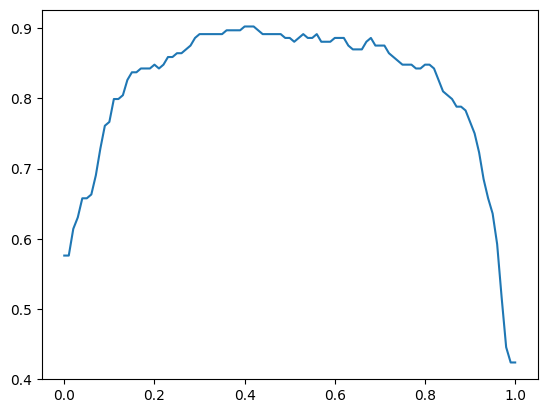

In [26]:
def version2a():

    columns = [
        # Categorical
        'st_slope',
        'chestpaintype', 
        'exerciseangina',
        'sex', 
        'fastingbs', 
        # 'restingecg', 
            
        # Numerical
        'maxhr',
        'oldpeak',
        'age', 
        # 'cholesterol', 
        # 'restingbp', 
    ]

    dv = DictVectorizer(sparse=False)

    train_dict = df_train[columns].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[columns].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]

    # ======================

    thresholds = np.linspace(0, 1, 101)

    scores = []

    for t in thresholds:
        score = accuracy_score(y_val, y_pred >= t)
        print('%.2f %.4f' % (t, score))
        scores.append(score)

    plt.plot(thresholds, scores)


version2a()




In [27]:
def version2b():

    columns = [
        # Categorical
        'st_slope',
        'chestpaintype', 
        'exerciseangina',
        'sex', 
        'fastingbs', 
        # 'restingecg', 
            
        # Numerical
        'maxhr',
        'oldpeak',
        'age', 
        # 'cholesterol', 
        # 'restingbp', 
    ]

    dv = DictVectorizer(sparse=False)

    train_dict = df_train[columns].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[columns].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]

    print(f"Accuracy: {accuracy_score(y_val, y_pred >= 0.5):.4f}")
    print(f"ROC AUC Score {roc_auc_score(y_val, y_pred):.4f}")
    print()

    pp(dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3))))

version2b()


Accuracy: 0.8859
ROC AUC Score 0.9490

{'age': 0.01,
 'chestpaintype=ASY': 0.947,
 'chestpaintype=ATA': -0.502,
 'chestpaintype=NAP': -0.424,
 'chestpaintype=TA': -0.224,
 'exerciseangina=N': -0.605,
 'exerciseangina=Y': 0.402,
 'fastingbs': 0.865,
 'maxhr': -0.008,
 'oldpeak': 0.411,
 'sex=F': -0.848,
 'sex=M': 0.645,
 'st_slope=Down': -0.323,
 'st_slope=Flat': 1.131,
 'st_slope=Up': -1.012}


## Version 3

In [28]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold


In [29]:
def version3():

    def train(df_train, y_train, C=1.0):
        dicts = df_train[categorical + numerical].to_dict(orient='records')

        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(dicts)

        model = LogisticRegression(C=C, solver='lbfgs', max_iter=2000)
        model.fit(X_train, y_train)
        
        return dv, model
    
    def predict(df, dv, model):
        dicts = df[categorical + numerical].to_dict(orient='records')

        X = dv.transform(dicts)
        y_pred = model.predict_proba(X)[:, 1]

        return y_pred

    n_splits = 5

    for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
        kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        scores = []

        for train_idx, val_idx in kfold.split(df_full_train):
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]

            y_train = df_train.heartdisease.values
            y_val = df_val.heartdisease.values

            dv, model = train(df_train, y_train, C=C)
            y_pred = predict(df_val, dv, model)

            auc = roc_auc_score(y_val, y_pred)
            scores.append(auc)

        print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

version3()

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.811 +- 0.044
C=0.01 0.897 +- 0.030
C=0.1 0.924 +- 0.018
C=0.5 0.924 +- 0.018
C=1 0.924 +- 0.019
C=5 0.924 +- 0.019
C=10 0.923 +- 0.019


In [30]:
def version3a():

    columns = [
        # Categorical
        'st_slope',
        'chestpaintype', 
        'exerciseangina',
        'sex', 
        'fastingbs', 
        # 'restingecg', 
            
        # Numerical
        'maxhr',
        'oldpeak',
        'age', 
        # 'cholesterol', 
        # 'restingbp', 
    ]
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[columns].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[columns].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='lbfgs', max_iter=1000, C=1)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]

    print(f"Accuracy: {accuracy_score(y_val, y_pred >= 0.5):.4f}")
    print(f"ROC AUC Score {roc_auc_score(y_val, y_pred):.4f}")
    print()

    pp(dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3))))

version3a()


Accuracy: 0.8859
ROC AUC Score 0.9490

{'age': 0.01,
 'chestpaintype=ASY': 0.947,
 'chestpaintype=ATA': -0.502,
 'chestpaintype=NAP': -0.424,
 'chestpaintype=TA': -0.224,
 'exerciseangina=N': -0.605,
 'exerciseangina=Y': 0.402,
 'fastingbs': 0.865,
 'maxhr': -0.008,
 'oldpeak': 0.411,
 'sex=F': -0.848,
 'sex=M': 0.645,
 'st_slope=Down': -0.323,
 'st_slope=Flat': 1.131,
 'st_slope=Up': -1.012}


## Version 4 - Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

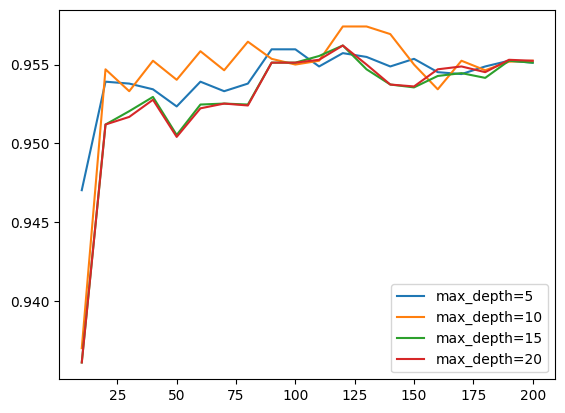

In [32]:
def version4():

    train_dicts = df_train.fillna(0).to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts) 

    val_dicts = df_val.fillna(0).to_dict(orient='records')
    X_val = dv.transform(val_dicts)

    scores = []

    for d in [5, 10, 15, 20]:
        for n in range(10, 201, 10):
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
            rf.fit(X_train, y_train)

            y_pred = rf.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, y_pred)

            scores.append((d, n, auc))

    columns = ['max_depth', 'n_estimators', 'auc']
    df_scores = pd.DataFrame(scores, columns=columns)

    for d in [5, 10, 15, 20]:
        df_subset = df_scores[df_scores.max_depth == d]
        plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)
        plt.legend()  

version4()

In [33]:
max_depth = 10

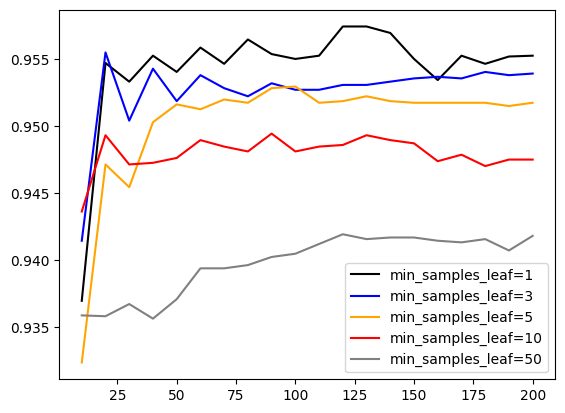

In [34]:
def version4a():

    train_dicts = df_train.fillna(0).to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts) 

    val_dicts = df_val.fillna(0).to_dict(orient='records')
    X_val = dv.transform(val_dicts)

    scores = []

    for s in [1, 3, 5, 10, 50]:
        for n in range(10, 201, 10):
            rf = RandomForestClassifier(n_estimators=n,
                                        max_depth=max_depth,
                                        min_samples_leaf=s,
                                        random_state=42)
            rf.fit(X_train, y_train)

            y_pred = rf.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, y_pred)

            scores.append((s, n, auc))

    columns = ['min_samples_leaf', 'n_estimators', 'auc']
    df_scores = pd.DataFrame(scores, columns=columns)

    colors = ['black', 'blue', 'orange', 'red', 'grey']
    values = [1, 3, 5, 10, 50]

    for s, col in zip(values, colors):
        df_subset = df_scores[df_scores.min_samples_leaf == s]
        
        plt.plot(df_subset.n_estimators, df_subset.auc,
                color=col,
                label='min_samples_leaf=%d' % s)

    plt.legend()

version4a()

In [35]:
min_samples_leaf = 1

In [36]:
def version4b():
    train_dicts = df_train.fillna(0).to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts) 

    val_dicts = df_val.fillna(0).to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    
    rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]

    print(f"Accuracy: {accuracy_score(y_val, y_pred >= 0.5):.4f}")
    print(f"ROC AUC Score {roc_auc_score(y_val, y_pred):.4f}")
    print()

version4b()

Accuracy: 0.9076
ROC AUC Score 0.9552



## Version 5 - XGBoost

In [37]:
import xgboost as xgb

Accuracy: 0.9076
ROC AUC Score 0.9582



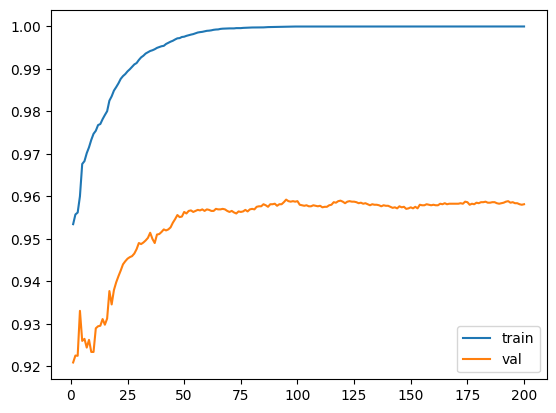

In [38]:
def convert_xgb_eval_results(evals_result: dict) -> pd.DataFrame:
    train_metric = evals_result['train']['auc']
    valid_metric = evals_result['val']['auc']

    df = pd.DataFrame({'train_auc': train_metric, 'val_auc': valid_metric})
    df.index = np.arange(1, len(df) + 1)
    df.index.name = 'boosting round'

    return df

def version5():
    train_dicts = df_train.fillna(0).to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts) 

    val_dicts = df_val.fillna(0).to_dict(orient='records')
    X_val = dv.transform(val_dicts)

    features = dv.get_feature_names_out()
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
    dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

    xgb_params = {
        'eta': 0.06, 
        'max_depth': 10,
        'min_child_weight': 1,
        
        'objective': 'binary:logistic',
        'nthread': 8,
        
        'seed': 42,
        'verbosity': 0,

        'eval_metric': 'auc',
    }

    watchlist = [(dtrain, 'train'), (dval, 'val')]

    evals_result = {}

    model = xgb.train(
        xgb_params, 
        dtrain, 
        num_boost_round=200, 
        evals=watchlist, 
        evals_result=evals_result,
        # early_stopping_rounds=10,
        verbose_eval=False
    )

    y_pred = model.predict(dval)

    print(f"Accuracy: {accuracy_score(y_val, y_pred >= 0.5):.4f}")
    print(f"ROC AUC Score {roc_auc_score(y_val, y_pred):.4f}")
    print()

    df_scores = convert_xgb_eval_results(evals_result)

    plt.plot(df_scores.index, df_scores.train_auc, label='train')
    plt.plot(df_scores.index, df_scores.val_auc, label='val')
    plt.legend()

version5()

## Full train

In [39]:
y_full_train = df_full_train.heartdisease.values
del df_full_train['heartdisease']

In [40]:
def version3_full_train():

    columns = [
        # Categorical
        'st_slope',
        'chestpaintype', 
        'exerciseangina',
        'sex', 
        'fastingbs', 
        # 'restingecg', 
            
        # Numerical
        'maxhr',
        'oldpeak',
        'age', 
        # 'cholesterol', 
        # 'restingbp', 
    ]
    
    full_train_dicts = df_full_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_full_train = dv.fit_transform(full_train_dicts) 

    test_dicts = df_test[columns].to_dict(orient='records')
    X_test = dv.transform(test_dicts)
    
    model = LogisticRegression(solver='lbfgs', max_iter=1000, C=1)
    model.fit(X_full_train, y_full_train)

    y_pred = model.predict_proba(X_test)[:, 1]

    print(f"Accuracy: {accuracy_score(y_test, y_pred >= 0.5):.4f}")
    print(f"ROC AUC Score {roc_auc_score(y_test, y_pred):.4f}")
    print()

version3_full_train()

Accuracy: 0.8587
ROC AUC Score 0.9278



In [41]:
def version4_full_train():
    
    full_train_dicts = df_full_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_full_train = dv.fit_transform(full_train_dicts) 

    test_dicts = df_test.to_dict(orient='records')
    X_test = dv.transform(test_dicts)
    
    rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=1,
                            random_state=42)
    rf.fit(X_full_train, y_full_train)

    y_pred = rf.predict_proba(X_test)[:, 1]

    print(f"Accuracy: {accuracy_score(y_test, y_pred >= 0.5):.4f}")
    print(f"ROC AUC Score {roc_auc_score(y_test, y_pred):.4f}")
    print()

    return dv, rf

version4_full_train()

Accuracy: 0.8750
ROC AUC Score 0.9441



(DictVectorizer(sparse=False),
 RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42))

In [42]:
def version5_full_train():
    full_train_dicts = df_full_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_full_train = dv.fit_transform(full_train_dicts) 

    test_dicts = df_test.to_dict(orient='records')
    X_test = dv.transform(test_dicts)

    features = dv.get_feature_names_out()
    dtrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
    dval = xgb.DMatrix(X_test, label=y_test, feature_names=features)

    xgb_params = {
        'eta': 0.06, 
        'max_depth': 10,
        'min_child_weight': 1,
        
        'objective': 'binary:logistic',
        'nthread': 8,
        
        'seed': 42,
        'verbosity': 0,

        'eval_metric': 'auc',
    }

    watchlist = [(dtrain, 'train'), (dval, 'val')]

    model = xgb.train(
        xgb_params, 
        dtrain, 
        num_boost_round=200, 
        evals=watchlist, 
        # early_stopping_rounds=10,
        verbose_eval=False
    )

    y_pred = model.predict(dval)

    print(f"Accuracy: {accuracy_score(y_test, y_pred >= 0.5):.4f}")
    print(f"ROC AUC Score {roc_auc_score(y_test, y_pred):.4f}")
    print()

version5_full_train()

Accuracy: 0.8750
ROC AUC Score 0.9413



## The winner is V4 - Decision Forest

# Exporting

In [43]:
import pickle

dv, model = version4_full_train()

f_out = open('model_notebook.bin', 'wb') 
pickle.dump((dv, model), f_out)
f_out.close()

Accuracy: 0.8750
ROC AUC Score 0.9441

